# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from brian2 import *
from brian2tools import brian_plot, plot_state

from TacNet import TacNet


set_device('cpp_standalone')
# Suppress code generation messages on the console
BrianLogger.suppress_hierarchy('brian2.codegen')
# Suppress preference messages even in the log file
BrianLogger.suppress_hierarchy('brian2.core.preferences', filter_log_file=True)

# Test TacNet - tactile encoding spiking network

WARNING    Cannot check whether the indices to record from are valid. This can happen in standalone mode when recording from synapses that have been created with a connection pattern. You can avoid this situation by using synaptic indices in the connect call. [brian2.monitors.statemonitor.cannot_check_statemonitor_indices]
INFO:root:creating /tmp/brian_flag_test_slsevziw/tmp
INFO:root:creating /tmp/brian_flag_test_slsevziw/tmp/brian_flag_test_slsevziw
INFO:root:/home/alex/miniconda3/envs/brian/bin/x86_64-conda-linux-gnu-cc -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /home/alex/miniconda3/envs/brian/include -fPIC -O2 -isystem /home/alex/miniconda3/envs/brian/include -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/alex/miniconda3/envs/brian/include -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/alex/miniconda3/envs/brian/

Starting simulation at t=0 s for duration 3.191 s
3.191 s (100%) simulated in < 1s


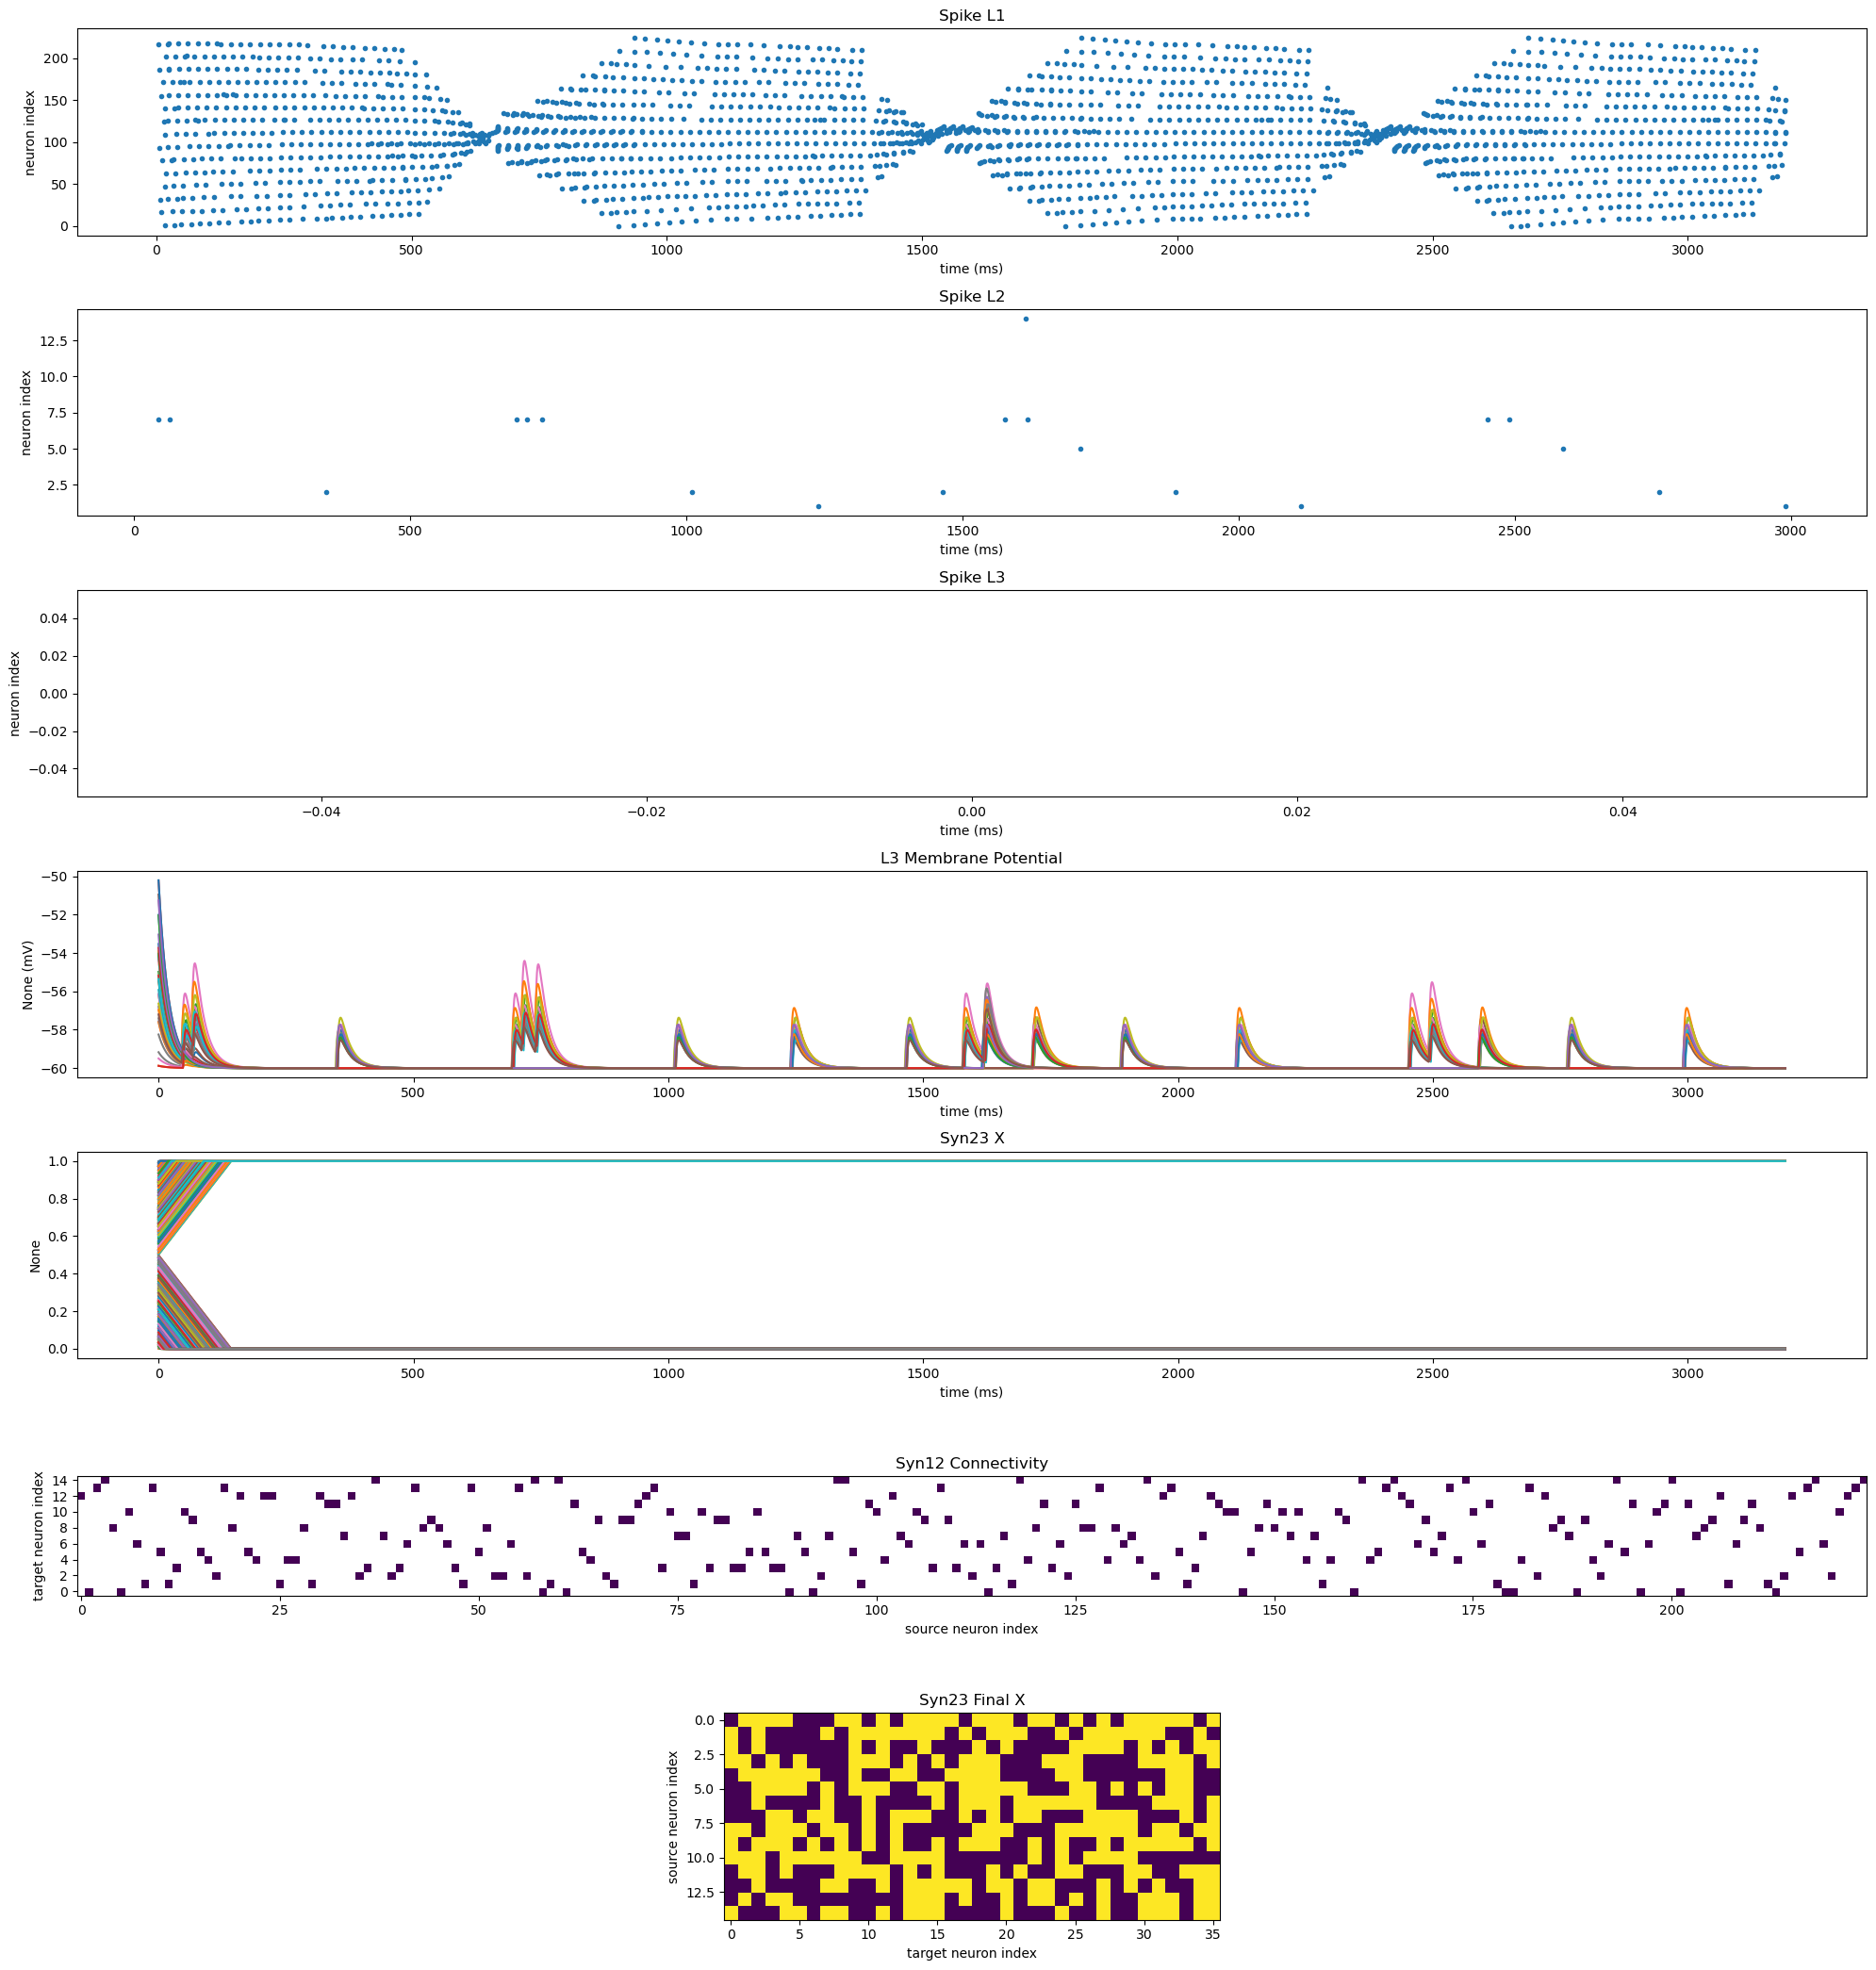

In [2]:
dt = 1*ms

# Load dataset
dataset = np.load("../data/touch.pkl", allow_pickle=True)
sensordata = dataset['sharp_site']['sensordata']
orientations = dataset['sharp_site']['orientations']
data = np.asarray(sensordata)

# Convert values to spikes
length, height, width = data.shape
inputs = data.reshape(length, -1)
inputs[inputs > 0] = 1.
I = TimedArray(inputs*200*pA, dt=dt)
if 'initiated' in locals():
    device.reinit()
    device.activate()
else:
    initiated = True

duration = I.values.shape[0]*dt
num_neurons = [height*width, 16, 36]
model = TacNet(num_neurons)
mons = model.run(I, duration)

# Plot results
fig, axs = plt.subplots(7, 1, figsize=(20, 21))
for i in range(3):
    axs[i].set_title('Spike L'+str(i+1))
    brian_plot(mons['SpikeMonitor_L'+str(i+1)], axes=axs[i])

axs[3].set_title('L3 Membrane Potential')
plot_state(mons['StateMonitor_L3'].t, mons['StateMonitor_L3'].v.T, axes=axs[3])
axs[4].set_title('Syn23 X')
plot_state(mons['StateMonitor_Syn23'].t,
            mons['StateMonitor_Syn23'].X.T, axes=axs[4])
axs[5].set_title('Syn12 Connectivity')
brian_plot(model.net['Syn12'], axes=axs[5])
axs[6].set_title('Syn23 Final X')
axs[6].set_xlabel('target neuron index')
axs[6].set_ylabel('source neuron index')
axs[6].imshow(model.net['Syn23'].X_[:].reshape(
    (num_neurons[1], num_neurons[2])))
plt.tight_layout()
plt.show()


<!--
 Copyright 2023 wngfra.
 SPDX-License-Identifier: Apache-2.0
-->



In [10]:
# Copyright 2023 wngfra.
# SPDX-License-Identifier: Apache-2.0

model.net['L1'].i

<L1.i: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 

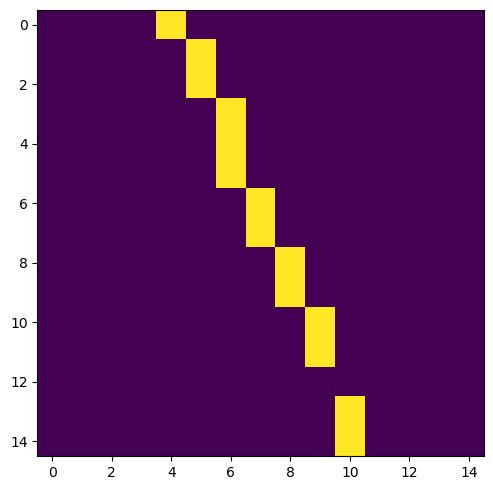

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(data[1010, :, :])
# axs[1].plot(orientations)
plt.tight_layout()
plt.show()

# Reference
1. F. Pascal, L. Bombrun, J. -Y. Tourneret and Y. Berthoumieu, "Parameter Estimation For Multivariate Generalized Gaussian Distributions," in IEEE Transactions on Signal Processing, vol. 61, no. 23, pp. 5960-5971, Dec.1, 2013, doi: 10.1109/TSP.2013.2282909.
2. A. Parvizi-Fard, M. Amiri, D. Kumar, M. M. Iskarous, and N. V. Thakor, “A functional spiking neuronal network for tactile sensing pathway to process edge orientation,” Sci Rep, vol. 11, no. 1, p. 1320, Dec. 2021, doi: 10.1038/s41598-020-80132-4.
3. J. A. Pruszynski and R. S. Johansson, “Edge-orientation processing in first-order tactile neurons,” Nat Neurosci, vol. 17, no. 10, pp. 1404–1409, Oct. 2014, doi: 10.1038/nn.3804.
4. J. M. Yau, S. S. Kim, P. H. Thakur, and S. J. Bensmaia, “Feeling form: the neural basis of haptic shape perception,” Journal of Neurophysiology, vol. 115, no. 2, pp. 631–642, Feb. 2016, doi: 10.1152/jn.00598.2015.
5. G. Sutanto, Z. Su, S. Schaal, and F. Meier, “Learning Sensor Feedback Models from Demonstrations via Phase-Modulated Neural Networks,” in 2018 IEEE International Conference on Robotics and Automation (ICRA), Brisbane, QLD, May 2018, pp. 1142–1149. doi: 10.1109/ICRA.2018.8460986.